In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/filtered_climate_data_final.csv")

# Define X (features) and y (target)
X = df.drop(columns=["Precip"])  # Drop original Precip column
y = df["Precip"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit only on training data
X_test = scaler.transform(X_test)



In [3]:
model_dt = DecisionTreeRegressor(max_depth=5, min_samples_split=5)
model_rf = RandomForestRegressor(max_depth=5, n_estimators=20)

model_dt.fit(X_train,y_train)
model_rf.fit(X_train,y_train)


RandomForestRegressor(max_depth=5, n_estimators=20)

In [4]:
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

# Metrics Calculation
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

# Evaluate Decision Tree
mae_dt, mse_dt, r2_dt = evaluate_model(y_test, y_pred_dt)
print(f"Decision Tree - MAE: {mae_dt}, MSE: {mse_dt}, R²: {r2_dt}")

# Evaluate Random Forest
mae_rf, mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, R²: {r2_rf}")

Decision Tree - MAE: 1.4536678814501938, MSE: 19.0643968049165, R²: 0.4926002810199498
Random Forest - MAE: 1.4640732700658676, MSE: 19.260437061175047, R²: 0.4873826613935731


In [5]:
#Hyper parameter optimization


from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# For DecisionTreeRegressor
param_dist_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

random_search_dt = RandomizedSearchCV(DecisionTreeRegressor(), param_dist_dt, n_iter=10, cv=5, random_state=42)
random_search_dt.fit(X_train, y_train)

print(f"Best parameters for DecisionTreeRegressor: {random_search_dt.best_params_}")

# For RandomForestRegressor
param_dist_rf = {
    'max_depth': [3, 5, 10, None],
    'n_estimators': [10, 20, 50, 100],
    'min_samples_split': [2, 5, 10]
}

random_search_rf = RandomizedSearchCV(RandomForestRegressor(), param_dist_rf, n_iter=10, cv=5, random_state=42)
random_search_rf.fit(X_train, y_train)

print(f"Best parameters for RandomForestRegressor: {random_search_rf.best_params_}")





Best parameters for DecisionTreeRegressor: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5}
Best parameters for RandomForestRegressor: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None}


In [6]:

# Apply SelectKBest to select top 5 features based on f_regression
selector = SelectKBest(f_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the list of selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))




Selected Features: ['Humidity_2m', 'RH_2m', 'WetBulbTemp_2m', 'TempRange_2m', 'isRainy']


In [7]:
best_dt = random_search_dt.best_estimator_
best_rf = random_search_rf.best_estimator_

best_dt.fit(X_train, y_train)
best_rf.fit(X_train, y_train)

y_train_pred_dt = best_dt.predict(X_train)
y_test_pred_dt = best_dt.predict(X_test)


y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)



In [8]:
train_mse_dt = mean_squared_error(y_train, y_train_pred_dt)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
train_r2_dt = r2_score(y_train, y_train_pred_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)
train_mae_dt = mean_absolute_error(y_train, y_train_pred_dt)
test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)

# Calculate evaluation metrics for Random Forest
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

# Print the evaluation metrics for Decision Tree
print("\nDecision Tree Regression Metrics:")
print(f"Train MSE: {train_mse_dt}")
print(f"Test MSE: {test_mse_dt}")
print(f"Train R-squared: {train_r2_dt}")
print(f"Test R-squared: {test_r2_dt}")
print(f"Train MAE: {train_mae_dt}")
print(f"Test MAE: {test_mae_dt}")

# Print the evaluation metrics for Random Forest
print("\nRandom Forest Regression Metrics:")
print(f"Train MSE: {train_mse_rf}")
print(f"Test MSE: {test_mse_rf}")
print(f"Train R-squared: {train_r2_rf}")
print(f"Test R-squared: {test_r2_rf}")
print(f"Train MAE: {train_mae_rf}")
print(f"Test MAE: {test_mae_rf}")


Decision Tree Regression Metrics:
Train MSE: 20.555374767563166
Test MSE: 19.22629684275671
Train R-squared: 0.4778884807921352
Test R-squared: 0.4882913047358537
Train MAE: 1.4784680258177647
Test MAE: 1.4541232077823325

Random Forest Regression Metrics:
Train MSE: 4.137513308300449
Test MSE: 17.925999398049218
Train R-squared: 0.894906155515665
Test R-squared: 0.522898775655936
Train MAE: 0.6224979709088578
Test MAE: 1.415281667309239


In [9]:
best_model = "DecisionTreeRegressor" if test_r2_dt > test_r2_rf else "Random Forest Regression"
print(f"\nBest performing model: {best_model}")


Best performing model: Random Forest Regression



Test Set Comparison:
   Actual Precip_log  Predicted Precip_log  Actual Precip  Predicted Precip
0                0.0              0.010499            0.0          0.010554
1                0.0              0.032304            0.0          0.032832
2                0.0              0.175555            0.0          0.191908
3                0.0              0.026750            0.0          0.027111
4                0.0              0.013880            0.0          0.013977

Train Set Comparison:
   Actual Precip_log  Predicted Precip_log  Actual Precip  Predicted Precip
0           0.000000              0.004606           0.00          0.004617
1           2.576422              2.063966          12.15          6.877150
2           0.792993              1.248806           1.21          2.486179
3           0.412110              0.033609           0.51          0.034180
4           0.783902              1.762806           1.19          4.828771

Best Model: Random Forest Regression
Train

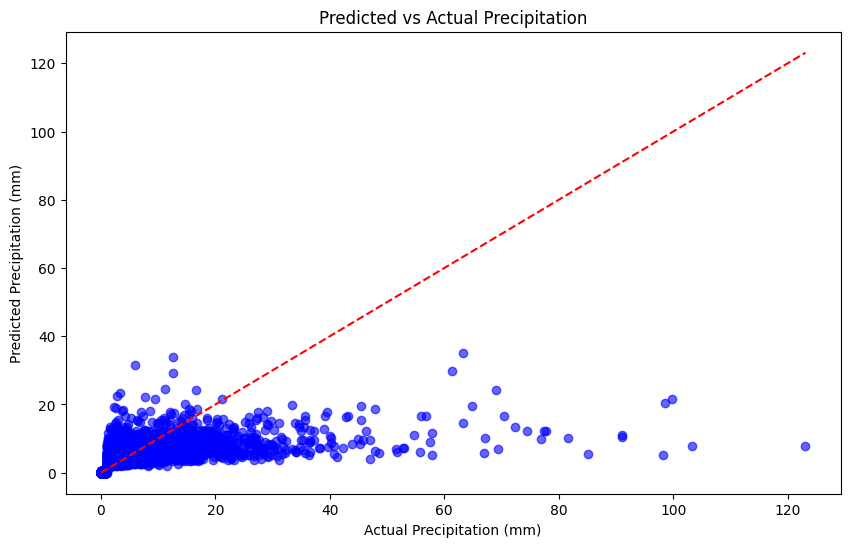

In [10]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/filtered_climate_data_final.csv")

# Apply log transformation to Precip
df['Precip_log'] = np.log1p(df['Precip'])  # log(1 + Precip)

# Define features (X) and target (y)
bestfeatures = ['Humidity_2m', 'RH_2m', 'WetBulbTemp_2m', 'TempRange_2m', 'isRainy']
X = df[bestfeatures]
y = df["Precip_log"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Model
best_rf = RandomForestRegressor(n_estimators=100, min_samples_split=2, max_depth=10)
best_rf.fit(X_train, y_train)

# Predict on train and test data
y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)

# **Convert Predictions Back to Original Precipitation**
results_test = pd.DataFrame({
    'Actual Precip_log': y_test.values,
    'Predicted Precip_log': y_test_pred_rf,
    'Actual Precip': np.expm1(y_test.values),  # Convert back using expm1
    'Predicted Precip': np.expm1(y_test_pred_rf)  # Convert back using expm1
})

# **Ensure no negative precipitation values by taking absolute values**
results_test["Predicted Precip"] = np.abs(results_test["Predicted Precip"])

print("\nTest Set Comparison:")
print(results_test.head())

# Same for train set
results_train = pd.DataFrame({
    'Actual Precip_log': y_train.values,
    'Predicted Precip_log': y_train_pred_rf,
    'Actual Precip': np.expm1(y_train.values),
    'Predicted Precip': np.expm1(y_train_pred_rf)
})

# **Ensure no negative precipitation values by taking absolute values**
results_train["Predicted Precip"] = np.abs(results_train["Predicted Precip"])

print("\nTrain Set Comparison:")
print(results_train.head())

# **Evaluation Metrics**
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

print("\nBest Model: Random Forest Regression")
print(f"Train MSE: {train_mse_rf}")
print(f"Test MSE: {test_mse_rf}")
print(f"Train R-squared: {train_r2_rf}")
print(f"Test R-squared: {test_r2_rf}")
print(f"Train MAE: {train_mae_rf}")
print(f"Test MAE: {test_mae_rf}")

# **Plot Actual vs Predicted Precipitation**
plt.figure(figsize=(10, 6))
plt.scatter(results_test["Actual Precip"], results_test["Predicted Precip"], color='blue', alpha=0.6)
plt.plot([results_test["Actual Precip"].min(), results_test["Actual Precip"].max()],
         [results_test["Actual Precip"].min(), results_test["Actual Precip"].max()],
         color='red', linestyle='--')  # 45-degree line
plt.title('Predicted vs Actual Precipitation')
plt.xlabel('Actual Precipitation (mm)')
plt.ylabel('Predicted Precipitation (mm)')
plt.show()